# Quantum Battery in Qubit = 1

Milou van Nederveen 

Quantum Inspire Starmon-5

Dates of experiments: 12/12, 13/12

In [53]:
import numpy as np
import os

from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from IPython.display import display, Math, Latex

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')
authentication = get_authentication()
QI.set_authentication(authentication, QI_URL)

backend = QI.get_backend('Starmon-5')

font = {'family':'serif'}

In [3]:
def finding_value(counts,qubit,shots):
    total = 0
    if qubit == 0:
        for binary_string, number in counts.items():
            if binary_string[4] == '1':
                total += number
    if qubit == 1:
        for binary_string, number in counts.items():
             if binary_string[3] == '1':
                total += number
    if qubit == 2:
        for binary_string, number in counts.items():
             if binary_string[2] == '1':
                total += number
    if qubit == 3:
        for binary_string, number in counts.items():
             if binary_string[1] == '1':
                total += number
    if qubit == 4:
        for binary_string, number in counts.items():
             if binary_string[0] == '1':
                total += number
    return total/shots

In [16]:
dataT=[]

In [28]:
theta = np.linspace(0, np.pi, 16)
num_datapoints = 20
shots = 1024
y_values = []
qubit=1

for t in theta:
    qr = QuantumRegister(5)
    cr = ClassicalRegister(5)
    qc = QuantumCircuit(qr,cr)
    
    qc.rx(t,qubit)
    qc.measure(qr[qubit],cr[qubit])
    
    job = backend.run(qc,shots)
    counts = job.result().get_counts()
    
    y = finding_value(counts,qubit,shots)
    y_values.append(y)

dataT.append(y_values)

we're at 10! 

In [32]:
dataT=[[0.021484375, 0.02734375, 0.0732421875, 0.1259765625, 0.1650390625, 0.212890625, 0.32421875, 0.4404296875, 0.50390625, 0.6455078125, 0.728515625, 0.8203125, 0.84375, 0.9248046875, 0.9443359375, 0.95703125], [0.0322265625, 0.037109375, 0.0595703125, 0.1328125, 0.162109375, 0.2509765625, 0.3466796875, 0.4345703125, 0.560546875, 0.640625, 0.7421875, 0.8193359375, 0.873046875, 0.912109375, 0.9423828125, 0.9609375], [0.0126953125, 0.0244140625, 0.0791015625, 0.125, 0.173828125, 0.22265625, 0.3544921875, 0.431640625, 0.5205078125, 0.658203125, 0.7236328125, 0.8154296875, 0.8505859375, 0.9111328125, 0.9521484375, 0.9619140625], [0.017578125, 0.0390625, 0.0615234375, 0.1064453125, 0.16015625, 0.2373046875, 0.3427734375, 0.453125, 0.552734375, 0.6298828125, 0.7373046875, 0.83203125, 0.8623046875, 0.92578125, 0.9423828125, 0.955078125], [0.0185546875, 0.0205078125, 0.0693359375, 0.1357421875, 0.166015625, 0.2421875, 0.3173828125, 0.4296875, 0.5283203125, 0.6435546875, 0.7421875, 0.8193359375, 0.8427734375, 0.908203125, 0.9423828125, 0.9423828125], [0.0107421875, 0.025390625, 0.060546875, 0.1171875, 0.1591796875, 0.2451171875, 0.310546875, 0.43359375, 0.5595703125, 0.6650390625, 0.7314453125, 0.8125, 0.8427734375, 0.900390625, 0.9384765625, 0.96875], [0.0234375, 0.03125, 0.052734375, 0.1142578125, 0.1650390625, 0.2177734375, 0.322265625, 0.4375, 0.53515625, 0.6357421875, 0.7236328125, 0.8291015625, 0.8349609375, 0.9111328125, 0.9423828125, 0.9541015625], [0.0166015625, 0.04296875, 0.0634765625, 0.1123046875, 0.142578125, 0.2333984375, 0.328125, 0.447265625, 0.529296875, 0.6435546875, 0.748046875, 0.828125, 0.861328125, 0.8974609375, 0.939453125, 0.9580078125], [0.0185546875, 0.0244140625, 0.0625, 0.1103515625, 0.15625, 0.2509765625, 0.3193359375, 0.4111328125, 0.5361328125, 0.6279296875, 0.7431640625, 0.8330078125, 0.8525390625, 0.9189453125, 0.9521484375, 0.9521484375], [0.0166015625, 0.0361328125, 0.064453125, 0.1201171875, 0.15625, 0.224609375, 0.30859375, 0.4365234375, 0.5283203125, 0.6357421875, 0.76171875, 0.8046875, 0.8544921875, 0.916015625, 0.9638671875, 0.947265625]]

## Plotting the raw data

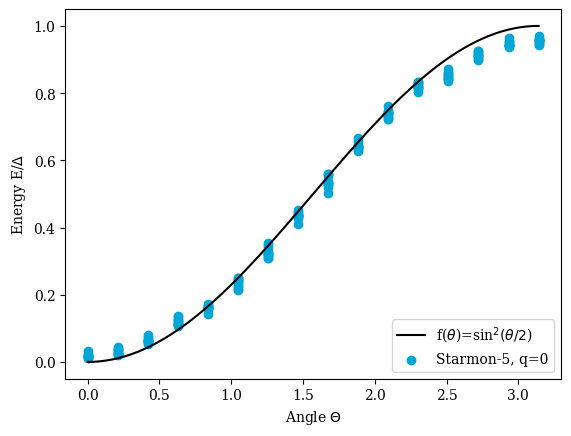

In [37]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(dataF)):
    plt.scatter(theta,dataF[i],color=tud_color)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=0"], prop=font, loc="lower right")
plt.show()

## Mean values & errors 

In [38]:
dataF=np.array(dataT)
data=dataF.transpose()

In [39]:
#Mean Value
mean_values = []
for t in range(len(theta)):
    mean_values.append(np.mean(data[t])) 
    
print('Mean values:', mean_values)

Mean values: [0.01884765625, 0.030859375, 0.0646484375, 0.12001953125, 0.16064453125, 0.2337890625, 0.32744140625, 0.435546875, 0.53544921875, 0.642578125, 0.73818359375, 0.82138671875, 0.85185546875, 0.91259765625, 0.94599609375, 0.95576171875]


In [44]:
#Standard Deviation
std_dev=[]
for t in range(len(theta)):
    std_dev.append(np.std(data[t])) 

print('Standard Deviation:', std_dev)

Standard Deviation: [0.005678356156291653, 0.007165600128064118, 0.007106798983851661, 0.00921752921604444, 0.007815551161998769, 0.013052370661409081, 0.014771940303728352, 0.01060818407343771, 0.01693737792924761, 0.01110021268623658, 0.011274539885679995, 0.008695794187298338, 0.010831042316468567, 0.008813442747944135, 0.007412231605135127, 0.007123553212826908]


In [45]:
#Standard Error
std_err=[]

for t in range(len(theta)):
    std_err.append(np.std(data[t]) / np.sqrt(np.size(data[t])))
    
print('Standard Error:', std_err)

Standard Error: [0.001795653881952068, 0.0022659617206676834, 0.0022473671661941445, 0.0029148386721846685, 0.0024714942841491724, 0.004127522015481111, 0.004671297681982107, 0.003354602351038607, 0.005356069184748868, 0.003510195460080357, 0.00356532256091632, 0.002749851569591558, 0.0034250763153706922, 0.0027870553110996748, 0.002343953441691282, 0.0022526653185943215]


In [47]:
#Maximum values 
max_values = []
for t in range(len(theta)):
    max_values.append(np.max(data[t])) 
print('Maximum values:',max_values)
    
#Minimum values
min_values = []
for t in range(len(theta)):
    min_values.append(np.min(data[t])) 
print('Minimum values:',min_values)

Maximum values: [0.0322265625, 0.04296875, 0.0791015625, 0.1357421875, 0.173828125, 0.2509765625, 0.3544921875, 0.453125, 0.560546875, 0.6650390625, 0.76171875, 0.8330078125, 0.873046875, 0.92578125, 0.9638671875, 0.96875]
Minimum values: [0.0107421875, 0.0205078125, 0.052734375, 0.1064453125, 0.142578125, 0.212890625, 0.30859375, 0.4111328125, 0.50390625, 0.6279296875, 0.7236328125, 0.8046875, 0.8349609375, 0.8974609375, 0.9384765625, 0.9423828125]


## Plot mean value with error bars

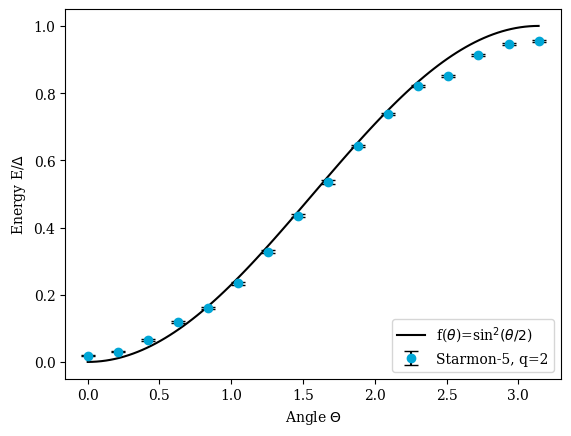

<Figure size 640x480 with 0 Axes>

In [60]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=std_err, fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=2"], prop=font, loc="lower right")
plt.show()
plt.savefig('starmon-5-q1-error-stdev.png')

In [49]:
max(mean_values)

0.95576171875

## Fit function

In [50]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

In [54]:
guess = [0.9999, 0]

xdata=theta
ydata=mean_values

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)


fit_a = parameters[0]
fit_b = parameters[1]

In [55]:
print(fit_a)
print(fit_b)

0.9706948287481036
-0.09944192150913157


In [56]:
fit_sin2 = sin2_func(xdata, fit_a, fit_b)

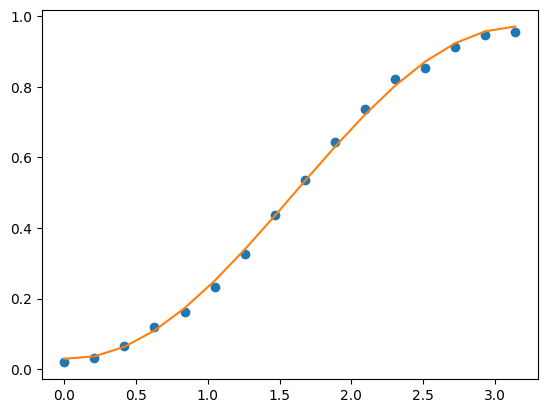

In [57]:
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_sin2 , '-', label='fit')

In [58]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.97069 with standard error of 0.00453.
The value of phi is -0.09944 with standard error of 0.02971.


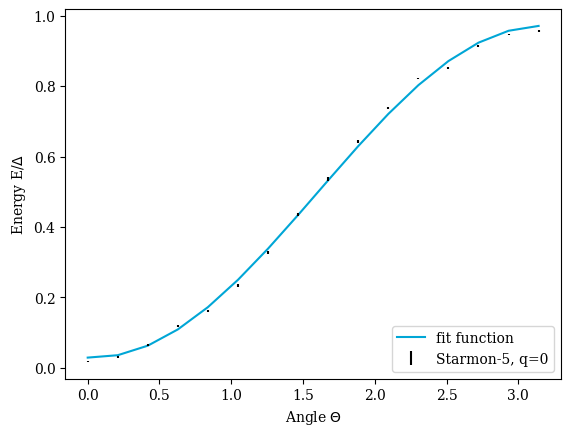

In [59]:
plt.plot(xdata, fit_sin2 , '-', label='fit',color=tud_color)
#plt.errorbar(theta, mean_values, yerr=std_err, fmt='.', ecolor='black',capsize=3)
plt.errorbar(theta, mean_values, yerr=std_err, fmt='none',ecolor='black')


plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)
plt.legend(["fit function", "Starmon-5, q=0"], prop=font, loc="lower right")

plt.savefig('starmon-5-q1-fit.png')